In [4]:
# import of libs
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
# function, that read a df and return grouped by company and aggregated by income mean df 
def read_n_agg(x):
    data_frame = pd.read_csv(x, sep=';')
    return data_frame.groupby('company', as_index=True) \
        .agg({'income': 'mean'})

In [3]:
names = 'Name1 Surname1, Name2 Surname2, …'

In [4]:
names_list = names.split(', ')

In [5]:
names_list

['Name1 Surname1', 'Name2 Surname2', '…']

In [6]:
# Create new data frame inside pandas, using dicts
df = pd.DataFrame({'client_id': [9002, 6722, 8799, 8737, 5208], 
                   'sex': [1, 1, 1, 0, 0], 
                   'wealth': ['medium', 'high', 'high', 'low', 'medium'], 
                   'age': [63, 54, 62, 54, 37]})

In [7]:
df

,client_id,sex,wealth,age
0,9002,1,medium,63
1,6722,1,high,54
2,8799,1,high,62
3,8737,0,low,54
4,5208,0,medium,37


In [10]:
# number of unique values in every column
unique_num = df.nunique()
unique_num

client_id    5
sex          2
wealth       3
age          4
dtype: int64

In [13]:
# delete all duplicates from df
df.drop_duplicates(subset='wealth')

,client_id,sex,wealth,age
0,9002,1,medium,63
1,6722,1,high,54
3,8737,0,low,54


In [17]:
# lets filter only duplicated rows by wealth column using .loc
df.loc[df.duplicated(subset='wealth')]

,client_id,sex,wealth,age
2,8799,1,high,62
4,5208,0,medium,37


In [49]:
path_to_file= '/home/jupyter-n-korotkov/lesson_3/homework/3_companies.csv'

In [50]:
# read data frame
df = pd.read_csv(path_to_file, sep=';')
df.head()

,company,income,date
0,"ЗАО «Доронин, Колобов и Калашникова»",1221331958,2019-09-09
1,ООО «Авдеев»,21116804375,1972-12-21
2,РАО «Аксенов Сорокина»,79257158759,2007-03-05
3,Ларионов Инкорпорэйтед,36799366126,2011-08-11
4,Григорьев Инкорпорэйтед,48201837498,1989-09-02


In [51]:
# use already created custom function at the start of a notebook
read_n_agg(path_to_file).head()

,income
company,
En +,9.962187e+10
"АО «Александрова, Савельев и Мельникова»",7.206782e+10
АО «Андреев-Анисимов»,6.931948e+09
АО «Андреев-Макарова»,8.934380e+10
АО «Большаков Кошелева»,7.860861e+10


In [5]:
path_to_file = '/home/jupyter-n-korotkov/lesson_3/homework/3_taxi_peru.csv'

In [6]:
taxi = pd.read_csv(path_to_file, sep=';', parse_dates=['start_at', 'end_at', 'arrived_at'])

In [7]:
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0


In [8]:
taxi.source.count()

22988

In [66]:
# Проверьте, с какой платформы было сделано больше всего заказов. 
# В ответе укажите значение в %, округлённое до целого.
taxi.source \
    .value_counts(normalize=True) \
    .mul(100) \
    .round()

iPhone     42.0
web        33.0
Android    21.0
iPad        2.0
Wap         1.0
Name: source, dtype: float64

In [ ]:
# Посчитайте частоту встречаемости каждой из оценок
# Переведите в проценты и округлите до 2 знаков после точки (.mul(100).round(2))
# Сбросьте индексы
# Переименуйте колонки в driver_score и percentage
# Отсортируйте по driver_score в порядке возрастания (от 0 до 5)
# Запишите результат в driver_score_counts

In [77]:
driver_score_counts = taxi.driver_score \
    .value_counts(normalize=True) \
    .mul(100) \
    .round() \
    .reset_index() \
    .rename(columns={'index': 'driver_score', 'driver_score': 'percentage'}) \
    .sort_values('driver_score')

driver_score_counts

,driver_score,percentage
2,0.0,14.0
4,1.0,1.0
5,2.0,1.0
3,3.0,3.0
1,4.0,22.0
0,5.0,59.0


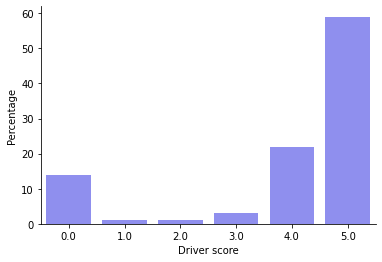

In [78]:
ax = sns.barplot(x='driver_score', y='percentage', data=driver_score_counts, color='blue', alpha=0.5)
# объявляем источник данных, оси абсцисс и ординат
ax.set(xlabel='Driver score', ylabel='Percentage') # подписываем нужные оси
sns.despine()  # убрать часть рамки графика
plt.show()

In [10]:
rider_score_counts = taxi.rider_score \
    .value_counts(normalize=True) \
    .mul(100) \
    .round() \
    .reset_index() \
    .rename(columns={'index': 'rider_score', 'rider_score': 'percentage'}) \
    .sort_values('rider_score')

rider_score_counts

,rider_score,percentage
2,0.0,2.0
4,1.0,0.0
5,2.0,0.0
3,3.0,1.0
1,4.0,9.0
0,5.0,87.0


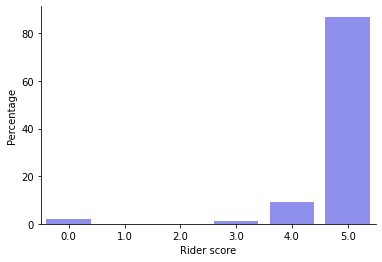

In [13]:
ax = sns.barplot(x='rider_score', y='percentage', data=rider_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Rider score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()